In [14]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import random

class Utils:
    
    def __init__(self):
        self.X = []
        self.y = []
    
    def generate_linear_data(self, n):
        w = [random.randint(-3, 3) for num in xrange(0,3)]
        b = random.randint(-3, 3)      
        dim = len(w)

        for i in xrange(n):
            x = np.random.uniform(-10,10,dim)
            if(np.dot(w,x) + b > 0.3):
                self.y.append(1)
                self.X.append(x)
            elif(np.dot(w,x) + b < -0.3):
                self.y.append(-1)
                self.X.append(x)
        return np.array(self.X), self.y
   
    def plot_plane_and_points(self, X, y, w, b):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        X1 = []
        X2 = []
        for i in xrange(len(y)):
            if (y[i] == -1):
                X1.append(X[i])
            else:
                X2.append(X[i])
        X1 = np.array(X1)
        X2 = np.array(X2)
        ax.scatter(X1[:,0], X1[:,1], X1[:,2], c='blue', marker='^')
        ax.scatter(X2[:,0], X2[:,1], X2[:,2], c='red', marker='o')
        # create x,y
        xx, yy = np.meshgrid(np.arange(-15,15), np.arange(-15,15))
        # calculate corresponding z
        z = (-w[0] * xx - w[1] * yy - b) * 1. /w[2]
        # plot the surface
        ax.plot_surface(xx, yy, z,alpha=0.3, color="green")

    
class Perceptron:
    
    def __init__(self, tol, eta):
        self.tol = tol #tolerancia de erro
        self.eta = eta #learning rate
        
    def fit(self, X, y):
        #initializing the weight vector and bias
        dim = len(X[0])
        self.w = np.random.uniform(-3,3,dim)
        self.b = np.random.uniform(-3, 3)
        
        varError = (self.tol+8000)*2 #this ensures the while loop will do its first iteration
        lastError = varError*10
        
        while varError > self.tol:
            #for each example we find the direction in which the error grows in relation to w and b
            sumDirW = 0
            sumDirB = 0
            for i in xrange(0,len(X)):
                sumDirW += -2 * X[i] * (self.sech(np.dot(self.w, X[i]) + self.b)**2) * (y[i] - self.yc(X[i]))
                sumDirB += -2 * (self.sech(np.dot(self.w, X[i]) + self.b)**2) * (y[i] - self.yc(X[i]))
            
            self.w -= (self.eta*sumDirW)/len(X)
            self.b -= (self.eta*sumDirB)/len(X)
            
            totalError = self.error(X, y)
            varError = abs(totalError - lastError)
            lastError = totalError
        
    def predict(self, X):
        y = []
        for x in X:
            y.append((np.dot(self.w, x)+self.b)/abs(np.dot(self.w, x)+self.b))
        return y #predict deve retornar as classes para X
    
    def error(self, X, y):
        error = 0
        for i in xrange(0, len(y)):
            yz = self.yc(X[i])
            error += (yz - y[i])**2
        return error
    
    def yc(self, x):
        return np.tanh(np.dot(self.w, x) + self.b)
    
    def sech(self, value):
        return 1/(np.cosh(value))

Hits: 989!
Misses: 0.


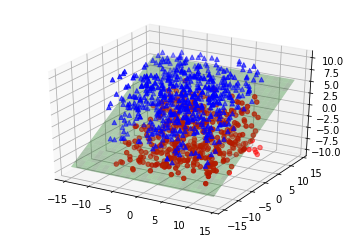

In [16]:
utils = Utils()
X1, y = utils.generate_linear_data(1000)
per = Perceptron(0.01, 0.1)
per.fit(X1, y)
utils.plot_plane_and_points(X1, y, per.w, per.b)

pred = per.predict(X1)

#X2, y = utils.generate_linear_data(300)
#pred = per.predict(X2)
#utils.plot_plane_and_points(X2, y, per.w, per.b)


hits = 0
misses = 0

for i in xrange(0, len(y)):
    if pred[i]*y[i] > 0:
        hits += 1
    else:
        misses += 1


print "Hits: {}!\nMisses: {}.".format(hits, misses)